In [1]:
#IMPORTING: Importing Modules
!pip install opendatasets
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Downloading Kaggle dataset and storing it to a directory.
#IMPORTING DATA: Kaggle username and key.
 #{"username":"joshuahiatt","key":"0e0d379008f0bf32b03c49a253c03b4a"}
od.download(
    "https://www.kaggle.com/datasets/cid007/pizza-restaurants-us", force=True
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshuahiatt
Your Kaggle Key: ··········


100%|██████████| 395k/395k [00:00<00:00, 729kB/s]

In [3]:
#Accessing the CSV file.
pizza_directory = ('./pizza-restaurants-us/Pizza_Restaurants_and_the_Pizza_They_Sell.csv')

In [4]:
#Reading the CSV File and storing in a dataframe.
pizza = pd.read_csv(pizza_directory)

In [5]:
pizza.shape

(10000, 19)

In [6]:
pizza.head()

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,http://www.citysearch.com/profile/menu/1550074...,7.98,7.98,NaN,Cheese Pizza,Shotgun Dans Pizza,72120,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,6.00,6.00,NaN,Pizza Cookie,Sauce Pizza Wine,85012,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,http://www.citysearch.com/profile/menu/8160503...,6.49,6.49,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,5.99,5.99,NaN,Small Pizza,Hungry Howies Pizza,48071,25,40,MI
4,AVwdaeTtkufWRAb55pSH,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,5.49,5.49,NaN,Pizza Sub,Spartan Pizzeria,21224,0,25,MD


In [7]:
#Makeing all string objects lower case.
for col in pizza:
  if pizza[col].dtype == 'object':
    pizza[col] = pizza[col].str.lower()

In [8]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   address            10000 non-null  object 
 2   categories         10000 non-null  object 
 3   primaryCategories  10000 non-null  object 
 4   city               10000 non-null  object 
 5   country            10000 non-null  object 
 6   keys               10000 non-null  object 
 7   latitude           10000 non-null  float64
 8   longitude          10000 non-null  float64
 9   menuPageURL        1679 non-null   object 
 10  menus.amountMax    10000 non-null  float64
 11  menus.amountMin    10000 non-null  float64
 12  menus.description  3718 non-null   object 
 13  menus.name         10000 non-null  object 
 14  name               10000 non-null  object 
 15  postalCode         9996 non-null   object 
 16  priceRangeMin      1000

In [9]:
#Saving first five digits of postalCode and Converting postalCode to integer and dropping null values.
pizza = pizza.dropna(subset=['postalCode'])
pizza['postalCode'] = pizza['postalCode'].str[:5]
pizza['postalCode'] = pd.to_numeric(pizza['postalCode'], errors='coerce')
pizza['postalCode'] = pizza['postalCode'].astype(int)


<ipython-input-9-951d57cf14e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pizza['postalCode'] = pizza['postalCode'].str[:5]
<ipython-input-9-951d57cf14e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pizza['postalCode'] = pd.to_numeric(pizza['postalCode'], errors='coerce')
<ipython-input-9-951d57cf14e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [10]:
#Going to filter out any menu items from the data fram that are over $50 as that is where the majority of the data exists with few exceptions.
pizza = pizza[pizza['menus.amountMin'] <= 50.00]
pizza = pizza[pizza['menus.amountMax'] <= 50.00]

In [11]:
#Delete Columns with many missing data entries and unused columns
pizza_cleansed = pizza.drop(columns=['menuPageURL', 'menus.description', 'id', 'categories', 'primaryCategories', 'keys', 'address', 'country', 'menus.amountMin', 'priceRangeMin', 'priceRangeMax'])

In [12]:
#Rename columns for correct syntax.
pizza_cleansed.rename(columns={'menus.name':'menu_item', 'menus.amountMax':'menus_amountMax', 'menus.amountMin':'menus_amountMin', 'province':'state'}, inplace=True)

In [13]:
#Removing special characters from 'menu_item'.
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('.').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('!').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('(').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split(')').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('"').str.get(0)

In [14]:
#Remove apostraphe from restuarant name.
pizza_cleansed['name'] = pizza_cleansed['name'].str.replace("'", "")

In [15]:
pizza_cleansed.head()

,city,latitude,longitude,menus_amountMax,menu_item,name,postalCode,state
0,sherwood,34.832300,-92.183800,7.98,cheese pizza,shotgun dans pizza,72120,ar
1,phoenix,33.509266,-112.073044,6.00,pizza cookie,sauce pizza wine,85012,az
2,cincinnati,39.144883,-84.432685,6.49,pizza blanca,mios pizzeria,45209,oh
3,madison heights,42.516669,-83.106630,5.99,small pizza,hungry howies pizza,48071,mi
4,baltimore,39.286630,-76.566984,5.49,pizza sub,spartan pizzeria,21224,md


In [16]:
pizza_cleansed.shape

(9953, 8)

In [17]:
#Import City, County and State Table
import requests
import zipfile
import io
import pandas as pd

url = "https://simplemaps.com/static/data/us-cities/1.77/basic/simplemaps_uscities_basicv1.77.zip"

response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('uscities.csv') as f:
        data = f.read()
        cities = pd.read_csv(io.StringIO(data.decode('utf-8')))

In [18]:
#Makeing all string objects lower case.
for col in cities:
  if cities[col].dtype == 'object':
    cities[col] = cities[col].str.lower()

In [19]:
#Delete Unused Columns
cities_cleansed = cities.drop(columns=['city_ascii', 'state_name', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'])

In [20]:
#Rename columns for correct syntax.
cities_cleansed.rename(columns={'state_id':'state', 'county_name':'county'}, inplace=True)

In [21]:
cities_cleansed.head()

,city,state,county,lat,lng,population,density
0,new york,ny,queens,40.6943,-73.9249,18908608,11226.2
1,los angeles,ca,los angeles,34.1141,-118.4068,11922389,3202.3
2,chicago,il,cook,41.8375,-87.6866,8497759,4648.7
3,miami,fl,miami-dade,25.7840,-80.2101,6080145,4728.2
4,houston,tx,harris,29.7860,-95.3885,5970127,1382.2


In [22]:
#Downloading Kaggle Cost of Living dataset and storing it to a directory.
#IMPORTING DATA: Kaggle username and key.
 #{"username":"joshuahiatt","key":"0e0d379008f0bf32b03c49a253c03b4a"}
od.download(
    "https://www.kaggle.com/datasets/asaniczka/us-cost-of-living-dataset-3171-counties", force=True
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshuahiatt
Your Kaggle Key: ··········


100%|██████████| 1.22M/1.22M [00:00<00:00, 1.74MB/s]

In [23]:
#Accessing the City CSV file.
county_directory = ('./us-cost-of-living-dataset-3171-counties/cost_of_living_us.csv')

In [24]:
#Reading the CSV File and storing in a dataframe.
counties = pd.read_csv(county_directory)

In [25]:
#Makeing all string objects lower case.
for col in counties:
  if counties[col].dtype == 'object':
    counties[col] = counties[col].str.lower()

In [26]:
#Delete Unused Columns
counties_cleansed = counties.drop(columns=['case_id', 'isMetro', 'areaname'])

In [27]:
#Drop word county from county names.
counties_cleansed['county'] = counties_cleansed['county'].str.replace(" county", "")

In [28]:
counties_cleansed.head()

,state,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,al,autauga,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,al,autauga,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,al,autauga,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,al,autauga,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,al,autauga,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


In [29]:
#Merge City and County Cost of Living Data
cc_merged_df = cities_cleansed.merge(counties_cleansed, on=['state', 'county'])

In [30]:
#Filterning to the average American Family Size of 2p3c.
filtered_df = cc_merged_df[cc_merged_df['family_member_count'] == '2p3c']

In [31]:
filtered_df.shape

(29443, 17)

In [32]:
pizza_demo_merged = pizza_cleansed.merge(filtered_df, on=['city', 'state'])

In [33]:
pizza_demo_merged.shape

(9002, 23)

In [34]:
df = pizza_demo_merged

In [35]:
df.head()

,city,latitude,longitude,menus_amountMax,menu_item,name,postalCode,state,county,lat,...,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,sherwood,34.832300,-92.183800,7.98,cheese pizza,shotgun dans pizza,72120,ar,pulaski,34.8507,...,2p3c,13930.1376,11347.83396,14147.0508,16806.4272,9159.20580,16560.4980,9542.6250,91493.7768,69916.585938
1,sherwood,34.830867,-92.231603,9.39,u,us pizza co,72120,ar,pulaski,34.8507,...,2p3c,13930.1376,11347.83396,14147.0508,16806.4272,9159.20580,16560.4980,9542.6250,91493.7768,69916.585938
2,phoenix,33.509266,-112.073044,6.00,pizza cookie,sauce pizza wine,85012,az,maricopa,33.5722,...,2p3c,21255.4164,11530.86396,14735.3304,16544.0856,11879.76192,20950.4124,12379.1016,109274.9760,78828.406250
3,phoenix,33.654650,-112.132750,5.50,meatball pizza roll,rays pizza,85027,az,maricopa,33.5722,...,2p3c,21255.4164,11530.86396,14735.3304,16544.0856,11879.76192,20950.4124,12379.1016,109274.9760,78828.406250
4,phoenix,33.654650,-112.132750,5.50,green pepper and onion pizza roll,rays pizza,85027,az,maricopa,33.5722,...,2p3c,21255.4164,11530.86396,14735.3304,16544.0856,11879.76192,20950.4124,12379.1016,109274.9760,78828.406250


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9002 entries, 0 to 9001
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    9002 non-null   object 
 1   latitude                9002 non-null   float64
 2   longitude               9002 non-null   float64
 3   menus_amountMax         9002 non-null   float64
 4   menu_item               9002 non-null   object 
 5   name                    9002 non-null   object 
 6   postalCode              9002 non-null   int64  
 7   state                   9002 non-null   object 
 8   county                  9002 non-null   object 
 9   lat                     9002 non-null   float64
 10  lng                     9002 non-null   float64
 11  population              9002 non-null   int64  
 12  density                 9002 non-null   float64
 13  family_member_count     9002 non-null   object 
 14  housing_cost            9002 non-null   

In [37]:
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 935.8/935.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 34.8 MB/s eta 0:00:00


In [42]:
# Filter for population >= 100,000
cities_cleansed = cities_cleansed[cities_cleansed['population'] >= 100000]

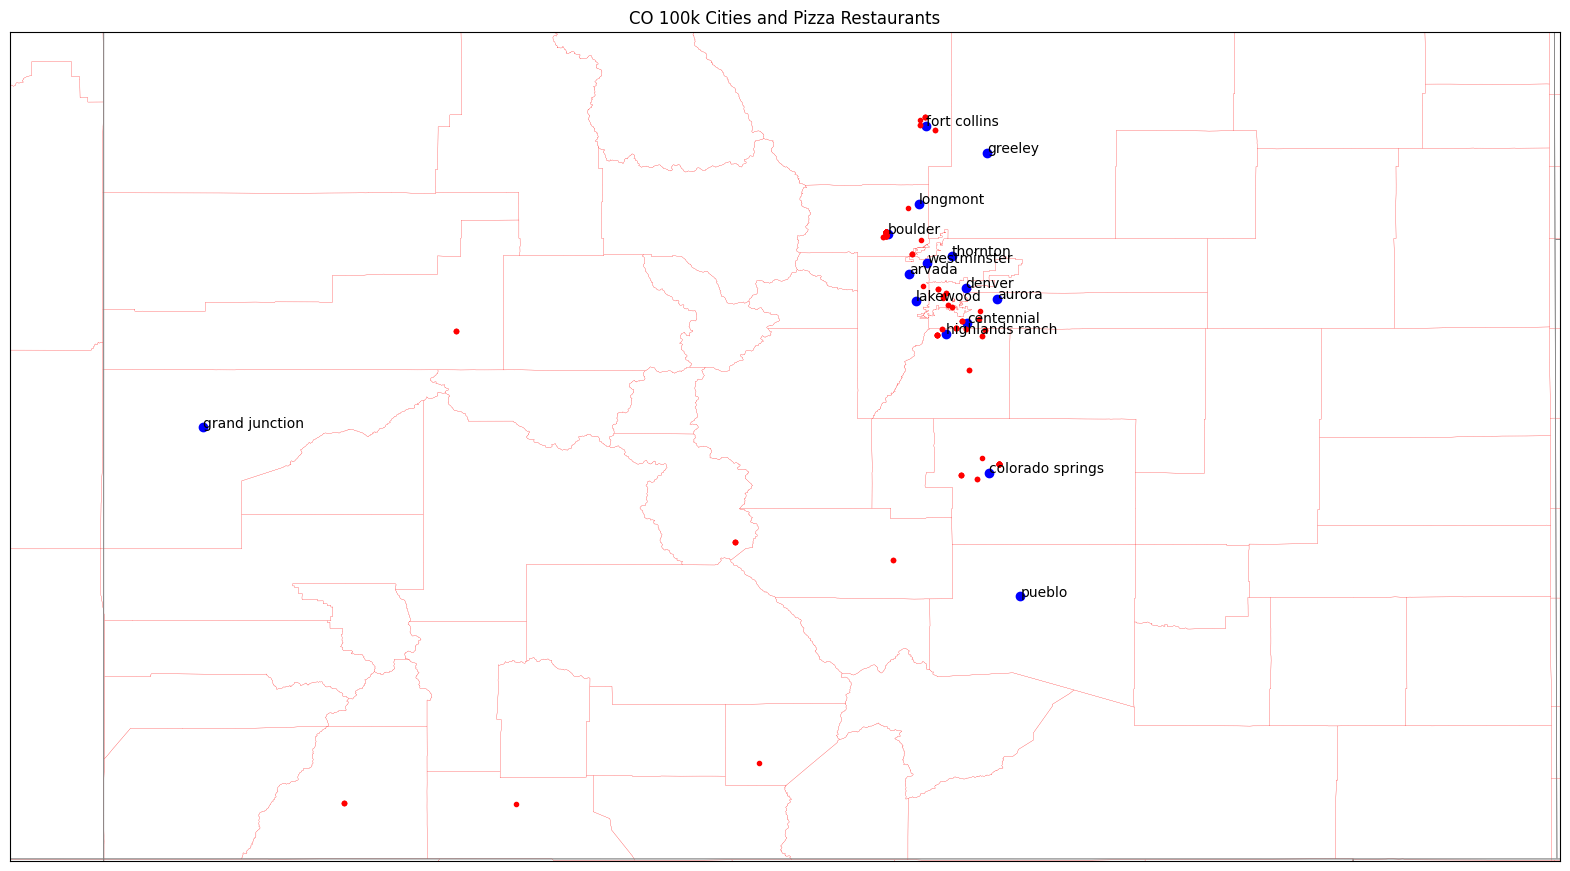

In [52]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Create basemap
fig = plt.figure(figsize=(20,20))
m = Basemap(llcrnrlon=-109.5, llcrnrlat=36.99, urcrnrlon=-102.0, urcrnrlat=41.0)
m.drawstates(color='gray')
m.drawcounties(color='red')

#City Populations
for idx in range(len(cities_cleansed)):
    pop = cities_cleansed['city'].iloc[idx]
    Lon = cities_cleansed['lng'].iloc[idx]
    Lat = cities_cleansed['lat'].iloc[idx]

    m.plot(Lon, Lat, 'bo')
    plt.annotate(pop, (Lon, Lat))

# Restaurant points
x, y = m(df['longitude'].tolist(), df['latitude'].tolist())
m.plot(x, y, 'ro', markersize=3)
#for idx in range(len(df)):
    #plt.annotate(text=df['name'].iloc[idx], xy=(x[idx], y[idx]))

plt.title('CO 100k Cities and Pizza Restaurants')
plt.show()